<a href="https://colab.research.google.com/github/joshpodl/Exploration-of-NYC-Public-Schools/blob/main/An_Exploration_of_NYC_Public_Schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Import pandas matplotlib and numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', index_col=0)
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [64]:
# Clean mean score column by dropping columns that are not numbers

df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')
df = df.dropna(subset=['Mean Score'])
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1,11.1,8,88.9,2,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na


In [65]:
# Include School Level high school only
df = df[df['School Level'] == 'High school']
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11,91.7,1,8.3,0,0,0,0
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25,50,25,50,3,6,15,30
01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15,28.3,38,71.7,6,11.3,29,54.7
01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48.0,6,100,0,0,0,0,0,0
01M292,Orchard Collegiate Academy,High school,Common Core English,2015,34,61.5,15,44.1,19,55.9,9,26.5,11,32.4


In [67]:
# average score by school
average_scores = df.groupby('School Name')['Mean Score'].mean()
average_scores.head()

,Mean Score
School Name,
47 The American Sign Language and English Secondar,60.699034
A. Philip Randolph Campus High School,65.531063
ACORN Community High School,60.067005
Abraham Lincoln High School,61.620147
Abraham Lincoln Yabc,57.846795


In [70]:
# print school with lowest average score
comparison_school = average_scores.idxmin()
print(f"The school with the lowest average score is {comparison_school}")

The school with the lowest average score is Academy for Social Action


In [73]:
# compare comparison school to other high school scores
print(f"The average score for {comparison_school} is {average_scores[comparison_school]}")
print("Comparison to other high schools:")
average_scores

The average score for Academy for Social Action is 50.03303964757709
Comparison to other high schools:


,Mean Score
School Name,
47 The American Sign Language and English Secondar,60.699034
A. Philip Randolph Campus High School,65.531063
ACORN Community High School,60.067005
Abraham Lincoln High School,61.620147
Abraham Lincoln Yabc,57.846795
...,...
Williamsburg Preparatory School,68.773443
Wings Academy,58.007860
Women's Academy of Excellence,62.103431


In [76]:
# comparison school vs average
average = average_scores.mean()
print(f"The average score for {comparison_school} is {average_scores[comparison_school]}")
print(f"The average score for all schools is {average}")

The average score for Academy for Social Action is 50.03303964757709
The average score for all schools is 63.75677301292572


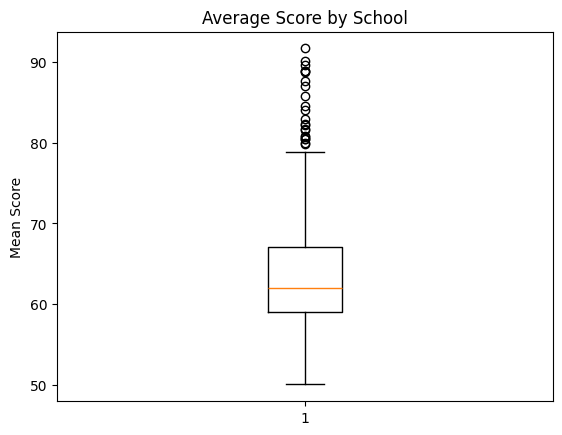

In [75]:
# box plot for average score
plt.boxplot(average_scores)
plt.title('Average Score by School')
plt.ylabel('Mean Score')
plt.show()

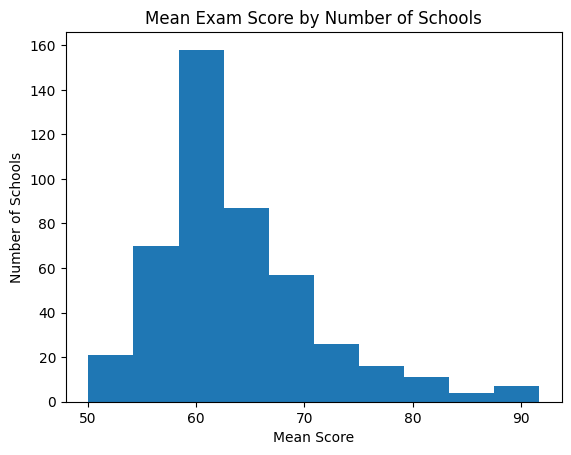

In [79]:
# histogram for average scores
plt.hist(average_scores, bins=10)
plt.title('Mean Exam Score by Number of Schools')
plt.xlabel('Mean Score')
plt.ylabel('Number of Schools')
plt.show()

In [82]:
# print number of schools and number of schools with mean score less than 55
print(f"Number of schools considered: {len(average_scores)}")
print(f"Number of schools with mean score less than 55: {len(average_scores[average_scores < 55])}")

Number of schools considered: 457
Number of schools with mean score less than 55: 27


In conclusion, Academy for Social Action has the lowest mean score of all 457 high schools considered, around 50. There are 26 other schools within 5 percentage points. They are nearly 14 percentage points below the average for all high schools. Further analysis could be done to highlight which subjects Academy for Social Action students struggle with the most compared to other schools. Additional information around school demographics could also help paint a clearer picture as to why certain schools perform better than others on the exams.